#                               Bank Customer Churn Prediction

## Background and Objective

As the banking industry faces increasing competition and higher customer expectations, accurately predicting customer churn has become a critical factor for banks in their efforts to retain customers and enhance overall customer satisfaction. Understanding the underlying factors that contribute to customer churn can provide valuable insights that help banks develop targeted retention strategies, optimize the customer experience, and improve overall customer relationship management practices. By leveraging advanced analytics and data-driven approaches, banks can gain a deeper understanding of customer behavior and preferences, enabling them to address customer churn more effectively.

The primary objective of this project is to develop a robust churn prediction model that can accurately identify potential churners among bank customers. Through the analysis of various customer-related data such as transaction history, demographics, account activity, and customer interactions, the model aims to predict which customers are most likely to churn in the near future. By utilizing sophisticated machine learning algorithms and predictive analytics techniques, the model can identify patterns and indicators that are indicative of potential churn, allowing banks to take proactive measures to retain these customers and minimize customer attrition. Ultimately, the development of an accurate churn prediction model can significantly contribute to the reduction of customer churn rates and improve overall customer retention for banks

## Dataset Description

This is a public dataset, The dataset format is given below.

Inside the dataset, there are 10000 rows and 14 different columns.

The target column here is Exited here.

###### The details about all the columns are given below

* RowNumber: Corresponds to the record (row) number and has no effect on the output.
* CustomerId: Contains random values and has no effect on customer leaving the bank.
* Surname: The surname of a customer has no impact on their decision to leave the bank.
* CreditScore: Can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
* Geography: A customer’s location can affect their decision to leave the bank.
* Gender: It’s interesting to explore whether gender plays a role in a customer leaving the bank.
* Age: This is certainly relevant, since older customers are less likely to leave their bank than younger ones.
* Tenure: Refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
* Balance: Also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
* NumOfProducts: Refers to the number of products that a customer has purchased through the bank.
* HasCrCard: Denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
* IsActiveMember: Active customers are less likely to leave the bank.
* EstimatedSalary: As with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
* Exited: Whether or not the customer left the bank.
* Complain: Customer has complaint or not.
* Satisfaction Score: Score provided by the customer for their complaint resolution.
* Card Type: Type of card hold by the customer.
* Points Earned: the points earned by the customer for using credit card.

### 1. Importing the Necessary Libraries

In [11]:
# Basics libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [12]:
# Algorithm used to build the model

from sklearn.model_selection import train_test_split   # to perfom train test split
from sklearn.linear_model import LogisticRegression   
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### 2.1  Loading the Dataset

In [13]:
data = pd.read_csv(r"C:\Users\rpala\Downloads\Churn_Modelling.csv")

### 2.2  Display Top 5 Records of The Dataset


In [14]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 2.3  To Check Last 5 Records of The Dataset

In [15]:
data.tail()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### 2.3 Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [16]:
data.shape

(10000, 14)

In [17]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 10000
Number of Columns 14


### 2.4  Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


###  Checking for Null values

In [19]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Get Overall Statistics About The Dataset

In [20]:
data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


# Data Preparation

## Preprocessing

####  Checking for Duplicates

In [21]:
# show duplicated data
data.duplicated().sum()

0

In [22]:
# show duplicated data in 'Surname'
data.duplicated('Surname').sum()

7068

###  Missing Value

In [23]:
# show missing values of data
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Dropping Irrelevant Features

In [56]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned'],
      dtype='object')

In [24]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [27]:
# Review the top rows of what is left of the data frame
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Encoding Categerical data

In [60]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [61]:
data = pd.get_dummies(data,drop_first=True)

In [62]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


# Exploratory Data Analysis

In [28]:
churn_counts = data['Exited'].value_counts()

In [29]:
labels = churn_counts.index
sizes = churn_counts.values
colors = ['red', 'lightskyblue']
explode = (0.1, 0)

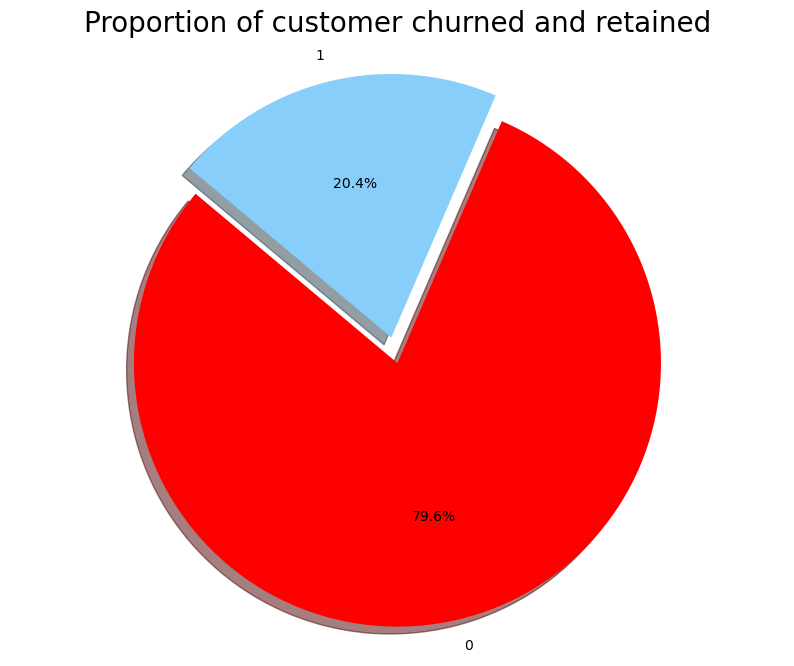

In [30]:
fig1, ax1 = plt.subplots(figsize=(10, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title("Proportion of customer churned and retained",size = 20)
plt.show()

So about 20% of the customers have churned. So the baseline model could be to predict that 20% of the customers will churn. Given 20% is a small number, we need to ensure that the chosen model does predict with great accuracy this 20% as it is of interest to the bank to identify and keep this bunch as opposed to accurately predicting the customers that are retained.

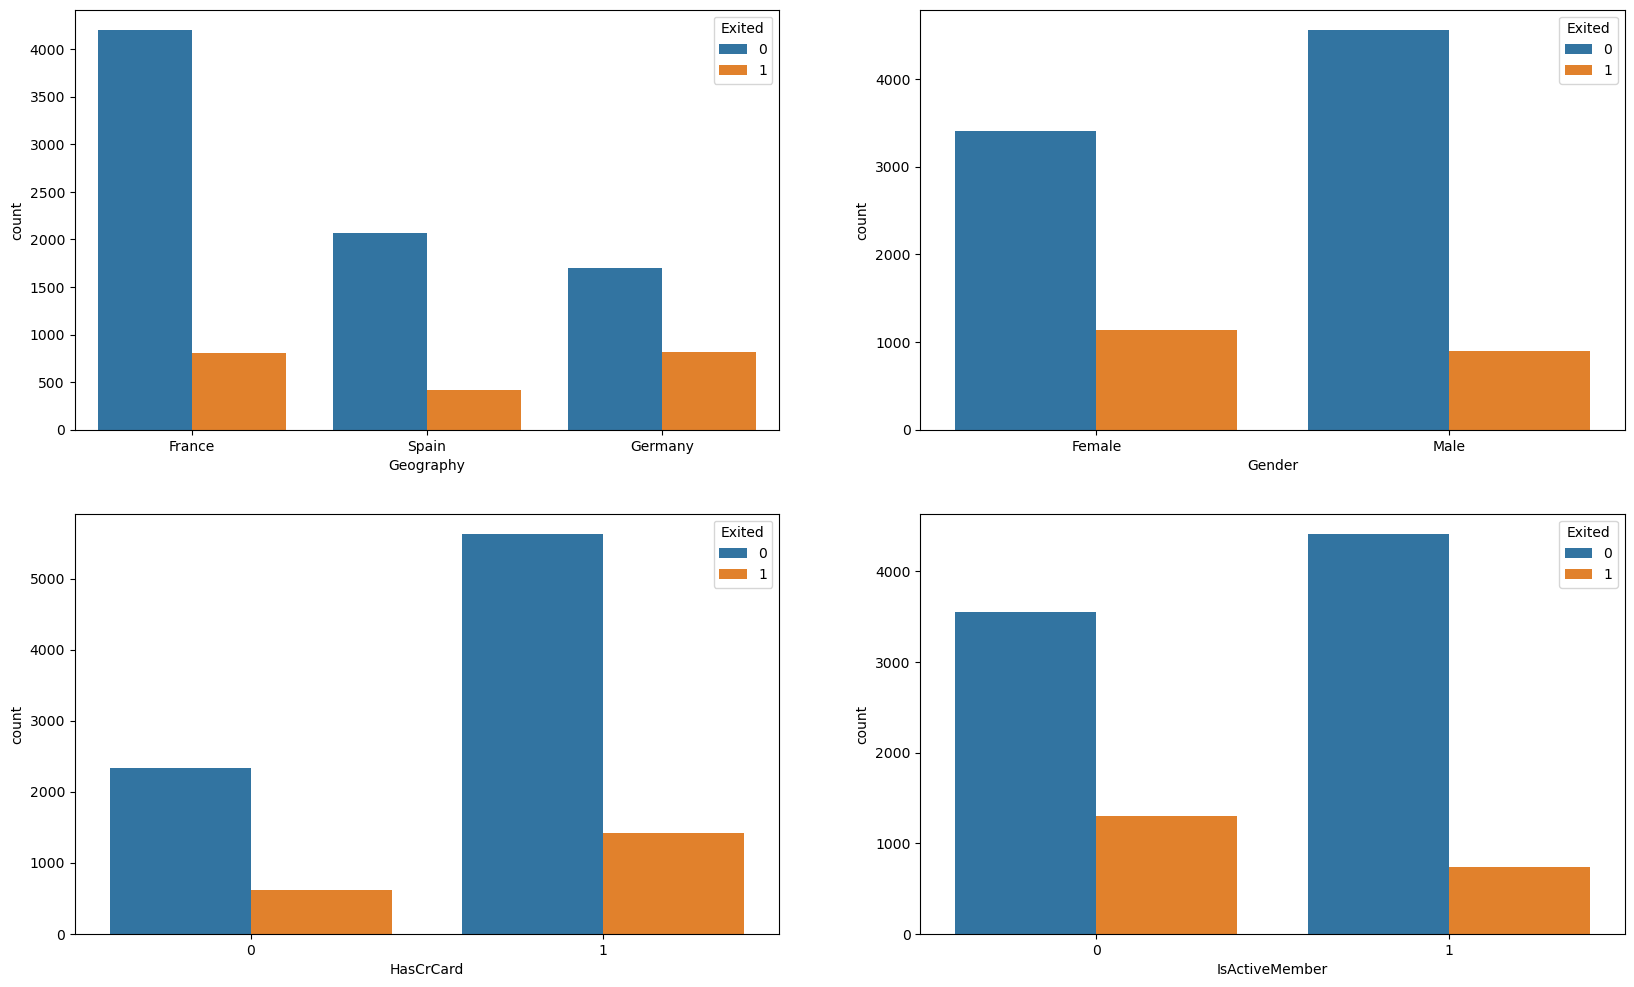

In [37]:
  # We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))

sns.countplot(x='Geography', hue='Exited', data=data, ax=axarr[0, 0])
sns.countplot(x='Gender', hue='Exited', data=data, ax=axarr[0, 1])
sns.countplot(x='HasCrCard', hue='Exited', data=data, ax=axarr[1, 0])
sns.countplot(x='IsActiveMember', hue='Exited', data=data, ax=axarr[1, 1])

plt.show()

We note the following:

* Majority of the data is from persons from France. However, the proportion of churned customers is with inversely related to the population of customers alluding to the bank possibly having a problem (maybe not enough customer service resources allocated) in the areas where it has fewer clients.
* The proportion of female customers churning is also greater than that of male customers
* Interestingly, majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence.
* Unsurprisingly the inactive members have a greater churn. Worryingly is that the overall proportion of inactive mebers is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will definately have a positive impact on the customer churn.

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

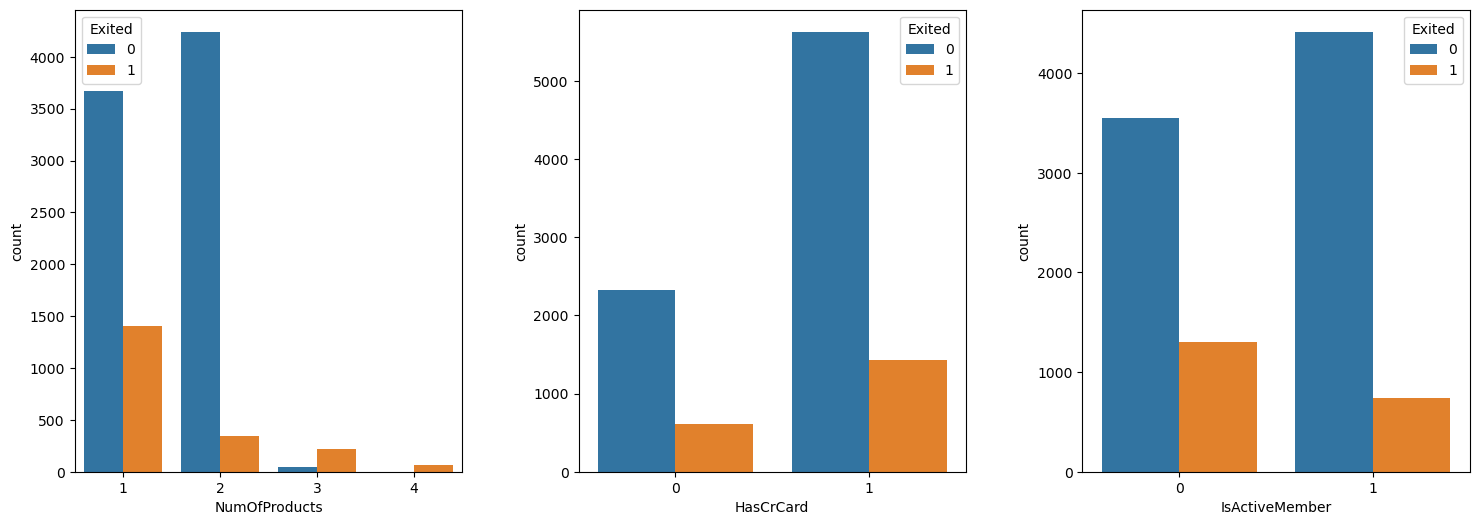

In [38]:
_, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.countplot(x = "NumOfProducts", hue="Exited", data = data, ax= ax[0])
sns.countplot(x = "HasCrCard", hue="Exited", data = data, ax = ax[1])
sns.countplot(x = "IsActiveMember", hue="Exited", data = data, ax = ax[2])

Customer with 3 or 4 products are higher chances to Churn

<AxesSubplot:>

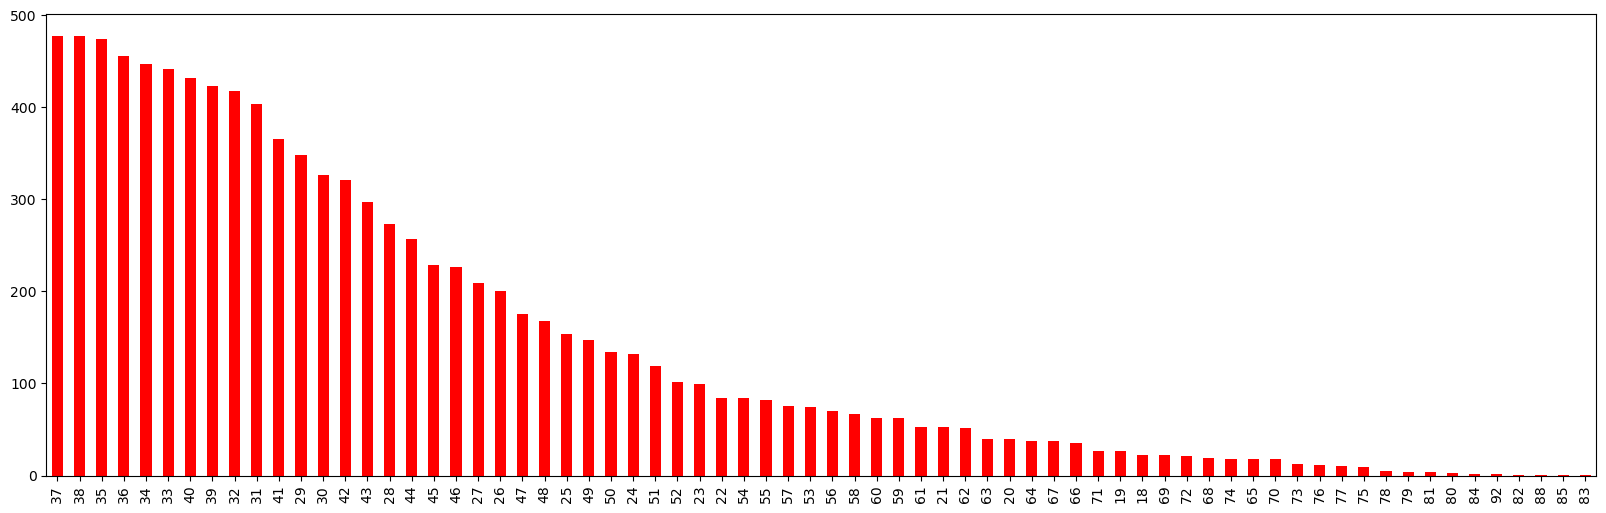

In [39]:
data["Age"].value_counts().plot.bar(figsize=(20,6),color='red')

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

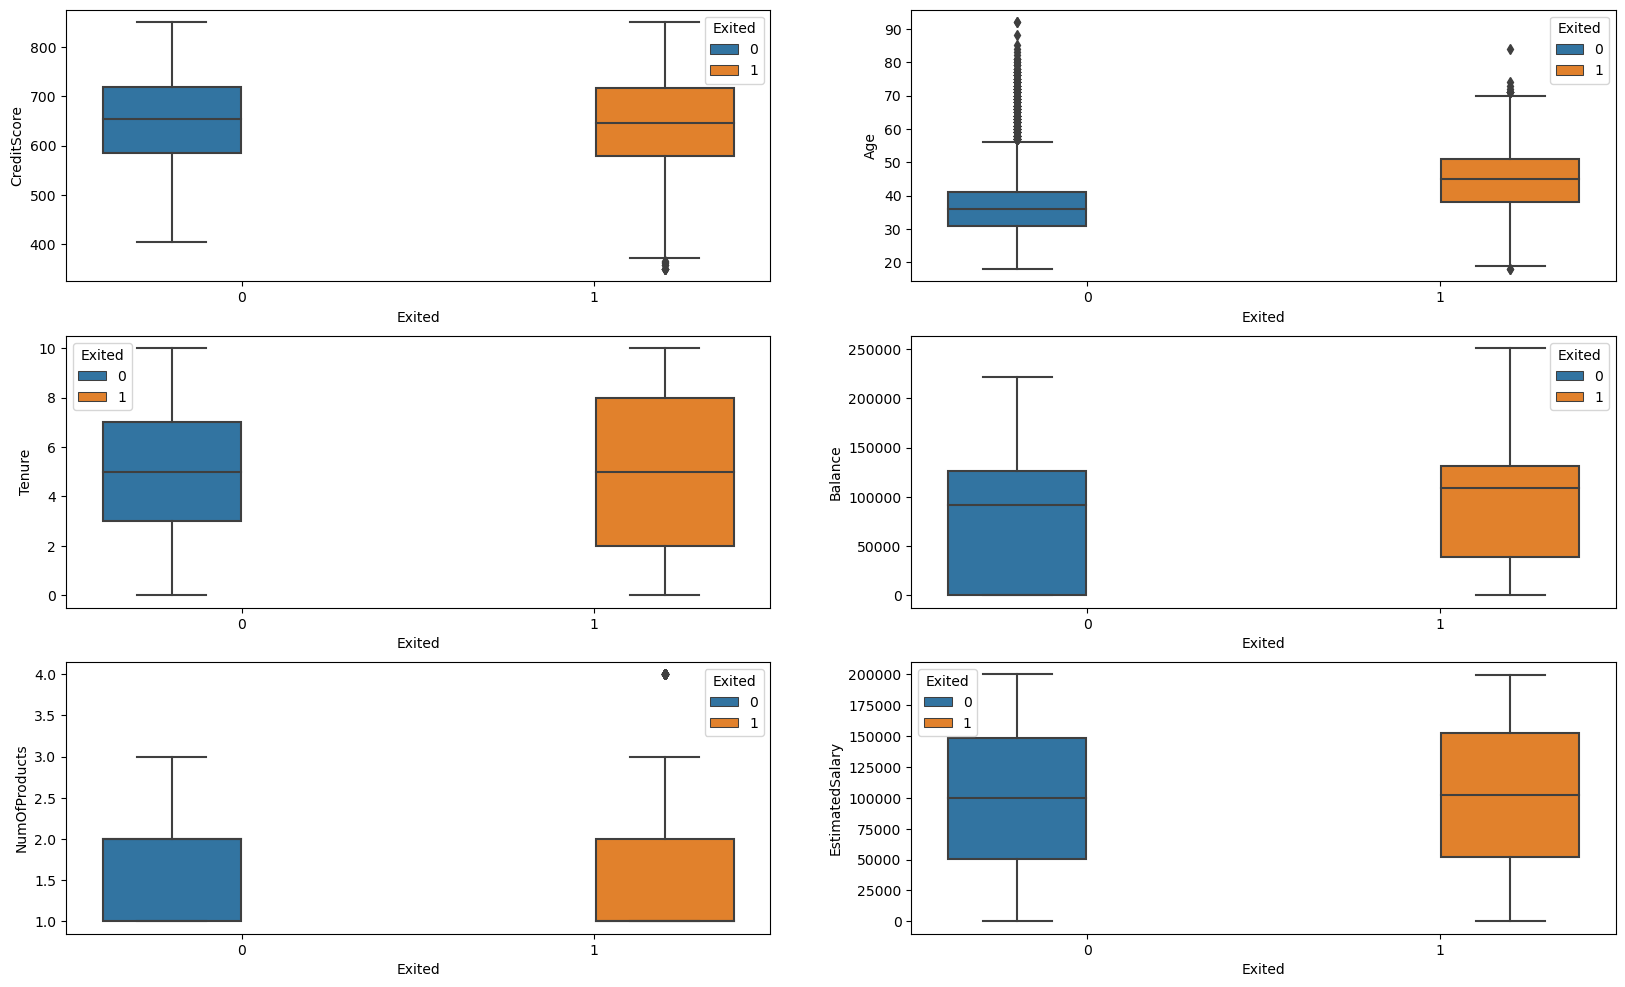

In [40]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x='Exited', hue='Exited', data=data, ax=axarr[0][0])
sns.boxplot(y='Age',x='Exited', hue='Exited',data=data, ax=axarr[0][1])
sns.boxplot(y='Tenure',x='Exited', hue='Exited',data=data, ax=axarr[1][0])
sns.boxplot(y='Balance',x='Exited', hue='Exited',data=data, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x='Exited', hue='Exited',data=data, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x='Exited', hue='Exited',data=data, ax=axarr[2][1])

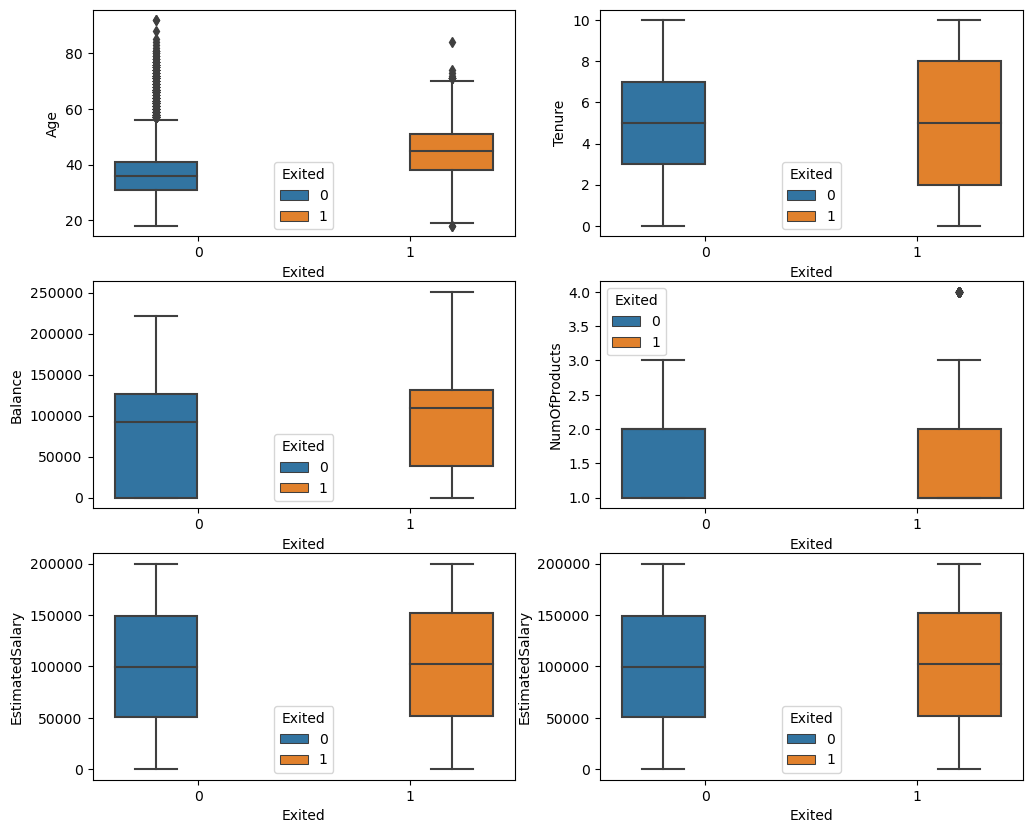

In [47]:
fig, axarr = plt.subplots(3, 2, figsize=(12, 10))

sns.boxplot(y='Age', x='Exited', hue='Exited', data=data, ax=axarr[0][0])
sns.boxplot(y='Tenure', x='Exited', hue='Exited', data=data, ax=axarr[0][1])
sns.boxplot(y='Balance', x='Exited', hue='Exited', data=data, ax=axarr[1][0])
sns.boxplot(y='NumOfProducts', x='Exited', hue='Exited', data=data, ax=axarr[1][1])
sns.boxplot(y='EstimatedSalary', x='Exited', hue='Exited', data=data, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = data, ax=axarr[2][1])
plt.show()

We note the following:

* There is no significant difference in the credit score distribution between retained and churned customers.
* The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories. The bank may need to review their target market or review the strategy for retention between the different age groups
* With regard to the tenure, the clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure.
* Worryingly, the bank is losing customers with significant bank balances which is likely to hit their available capital for lending.
* Neither the product nor the salary has a significant effect on the likelihood to churn

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69]),
 [Text(0, 0, '18'),
  Text(1, 0, '19'),
  Text(2, 0, '20'),
  Text(3, 0, '21'),
  Text(4, 0, '22'),
  Text(5, 0, '23'),
  Text(6, 0, '24'),
  Text(7, 0, '25'),
  Text(8, 0, '26'),
  Text(9, 0, '27'),
  Text(10, 0, '28'),
  Text(11, 0, '29'),
  Text(12, 0, '30'),
  Text(13, 0, '31'),
  Text(14, 0, '32'),
  Text(15, 0, '33'),
  Text(16, 0, '34'),
  Text(17, 0, '35'),
  Text(18, 0, '36'),
  Text(19, 0, '37'),
  Text(20, 0, '38'),
  Text(21, 0, '39'),
  Text(22, 0, '40'),
  Text(23, 0, '41'),
  Text(24, 0, '42'),
  Text(25, 0, '43'),
  Text(26, 0, '44'),
  Text(27, 0, '45'),
  Text(28, 0, '46'),
  Text(29, 0, '47'),
  Text(30, 0, '48'),
  Text(31, 0, '49'),
  Text(32, 0, '5

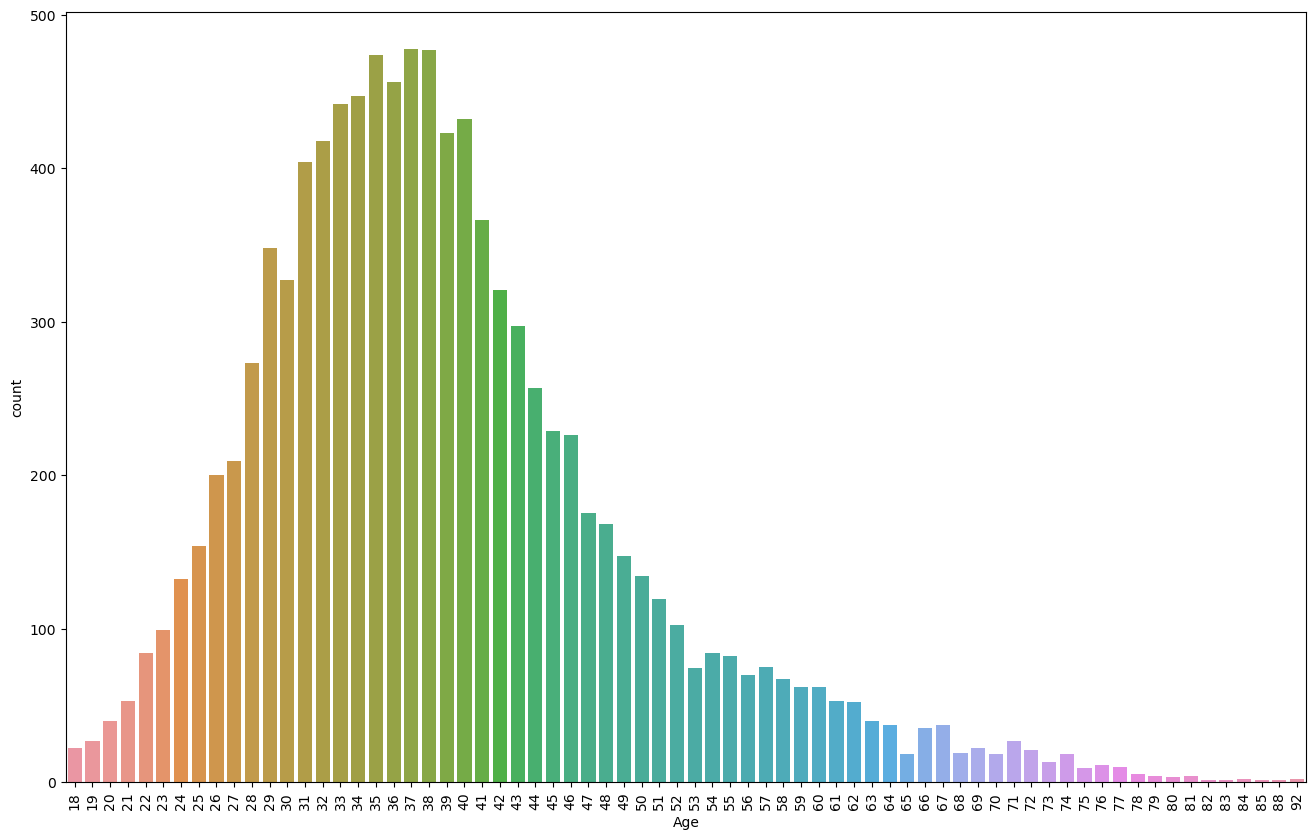

In [48]:
plt.figure(figsize = (16,10))
ax = sns.countplot(data=data,x='Age')
plt.xticks(rotation=90)

We note the following:

* There is no significant difference in the credit score distribution between retained and churned customers.
* The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories. The bank may need to review their target market or review the strategy for retention between the different age groups
* With regard to the tenure, the clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure.
* Worryingly, the bank is losing customers with significant bank balances which is likely to hit their available capital for lending.
* Neither the product nor the salary has a significant effect on the likelihood to churn.

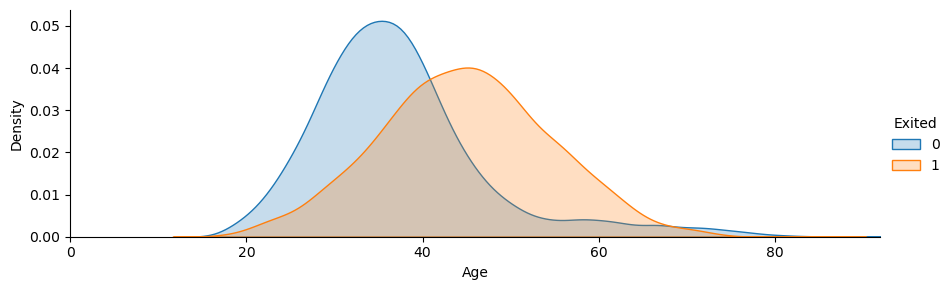

In [49]:

facet = sns.FacetGrid(data, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Age",shade= True)
facet.set(xlim=(0, data["Age"].max()))
facet.add_legend()

plt.show()

this plot allows you to visualize the distribution of ages for customers who churned and those who did not churn, providing insights into the relationship between age and customer churn. It helps identify patterns, potential age-related trends, and the general influence of age on customer retention in the dataset

In [50]:
sns.boxplot(y='Tenure',x='Exited', hue='Exited',data=data, ax=axarr[1][0])

<AxesSubplot:xlabel='Exited', ylabel='Tenure'>

### checking wheather of target variable is balanced or not

In [51]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [52]:
import seaborn as sns

<AxesSubplot:xlabel='Exited', ylabel='count'>

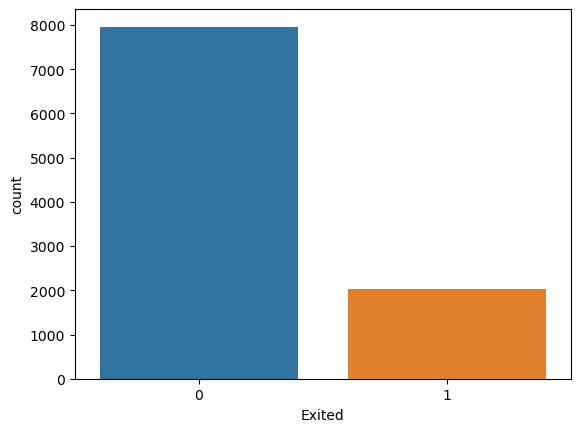

In [53]:
sns.countplot(data['Exited'])

In [56]:
#we can clearly see that our target variable is imbalnced

## Handling Imbalanced Data With SMOTE

In [65]:
from imblearn.over_sampling import SMOTE

In [66]:
X = data.drop('Exited',axis=1)
y = data['Exited']

In [67]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [65]:
y_res.value_counts()

1    7962
0    7962
Name: Exited, dtype: int64

Now our target variable is balanced

##  Splitting The Dataset Into The Training Set And Test Set

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=42)

## Feature Scaling

In [70]:
from sklearn.preprocessing import StandardScaler


In [71]:
sc= StandardScaler()

In [72]:
X_train=sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [73]:
X_train

array([[ 0.58659041,  0.81138863, -1.03263714, ..., -0.58000893,
        -0.46375548, -0.83939017],
       [ 1.09991628,  0.10841742, -1.40119849, ..., -0.58000893,
        -0.46375548,  1.19134109],
       [ 0.2589356 ,  0.91181308, -1.03263714, ..., -0.58000893,
        -0.46375548, -0.83939017],
       ...,
       [ 0.20432647,  0.20884188,  1.17873092, ..., -0.58000893,
        -0.46375548,  1.19134109],
       [-1.04076182, -0.09243149, -0.6640758 , ...,  1.72411137,
        -0.46375548, -0.83939017],
       [ 0.53198128,  1.01223754, -1.40119849, ...,  1.72411137,
        -0.46375548,  1.19134109]])

## Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression


In [103]:
LR=LogisticRegression()

In [110]:
LR.fit(X_train,y_train)

LogisticRegression()

In [111]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [112]:
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

In [113]:
print("Train Accuracy",accuracy_score(y_train, y_train_pred)*100)
print("Test Accuracy",accuracy_score(y_test, y_test_pred)*100)

Train Accuracy 79.03750000000001
Test Accuracy 78.95


In [114]:
print("confusion_matrix:-","\n",confusion_matrix(y_train, y_train_pred),"\n")
print("classification_report:-","\n",classification_report(y_train, y_train_pred))

confusion_matrix:- 
 [[6241  133]
 [1544   82]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.80      0.98      0.88      6374
           1       0.38      0.05      0.09      1626

    accuracy                           0.79      8000
   macro avg       0.59      0.51      0.49      8000
weighted avg       0.72      0.79      0.72      8000



### An accuracy of 79.03% on the training data and 78.95% on the test data indicates that the logistic regression model is performing well in terms of correctly classifying instances.

## Decision Tree Classifier

In [119]:
from sklearn.tree import DecisionTreeClassifier


In [120]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train,y_train)

DecisionTreeClassifier()

In [121]:
train_pred=DTC.predict(X_train)
print(train_pred)
test_pred=DTC.predict(X_test)
test_pred

[0 0 0 ... 1 0 0]


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [122]:
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")

Train Accuracy:- 79.03750000000001 

Test Accuracy:- 78.95 



In [123]:
print("confusion_matrix:-","\n",confusion_matrix(y_train, y_train_pred),"\n")
print("classification_report:-","\n",classification_report(y_train, y_train_pred))

confusion_matrix:- 
 [[6241  133]
 [1544   82]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.80      0.98      0.88      6374
           1       0.38      0.05      0.09      1626

    accuracy                           0.79      8000
   macro avg       0.59      0.51      0.49      8000
weighted avg       0.72      0.79      0.72      8000



### The Decision Tree model demonstrated good accuracies on both the training (79.03) and test (78.95) datasets, showcasing its ability to effectively learn and generalize.

## Random Forest Classifier

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [134]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_train, y_train_pred),"\n")

print("classification_report:-","\n",classification_report(y_train, y_train_pred))

Train Accuracy:- 100.0 

Test Accuracy:- 83.6 

confusion_matrix:- 
 [[6374    0]
 [   0 1626]] 

classification_report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6374
           1       1.00      1.00      1.00      1626

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



# Feature Selection Technique

In [135]:
# let me import Extra tree regressor

from sklearn.ensemble import ExtraTreesClassifier

selection = ExtraTreesClassifier()
selection.fit(X,y)

ExtraTreesClassifier()

In [136]:
selection.feature_importances_

array([0.13441605, 0.23679151, 0.10497362, 0.13223823, 0.14337653,
       0.02119592, 0.03393375, 0.13315501, 0.02889178, 0.01382941,
       0.01719818])

In [137]:
F_imp=pd.Series(selection.feature_importances_,index = X.columns)
F_imp

CreditScore          0.134416
Age                  0.236792
Tenure               0.104974
Balance              0.132238
NumOfProducts        0.143377
HasCrCard            0.021196
IsActiveMember       0.033934
EstimatedSalary      0.133155
Geography_Germany    0.028892
Geography_Spain      0.013829
Gender_Male          0.017198
dtype: float64

<AxesSubplot:>

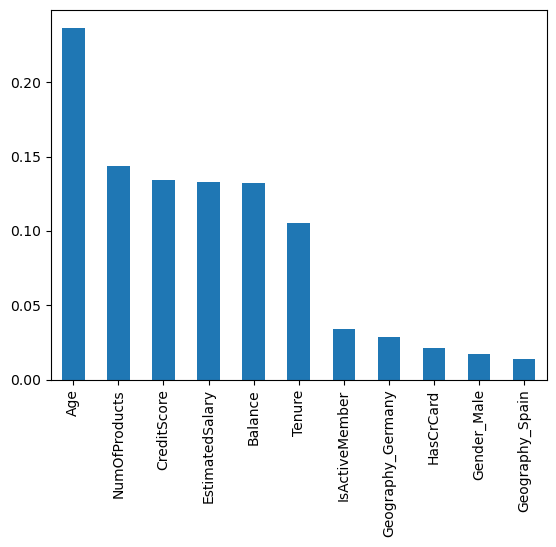

In [138]:
F_imp.sort_values(ascending=False).plot(kind='bar')

In [139]:
X_imp = X[F_imp.nlargest(6).index]
X_imp

,Age,NumOfProducts,CreditScore,EstimatedSalary,Balance,Tenure
0,42,1,619,101348.88,0.00,2
1,41,1,608,112542.58,83807.86,1
2,42,3,502,113931.57,159660.80,8
3,39,2,699,93826.63,0.00,1
4,43,1,850,79084.10,125510.82,2
...,...,...,...,...,...,...
9995,39,2,771,96270.64,0.00,5
9996,35,1,516,101699.77,57369.61,10
9997,36,1,709,42085.58,0.00,7
9998,42,2,772,92888.52,75075.31,3


In [140]:
X_train,X_test,y_train,y_test = train_test_split(X_imp,y,test_size =0.2,random_state = 14)

In [141]:
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
train_pred=RFC.predict(X_train)
train_pred
test_pred=RFC.predict(X_test)
test_pred
train_accuracy=accuracy_score(train_pred,y_train)*100
print("Train Accuracy",train_accuracy)
test_accuracy=accuracy_score(test_pred,y_test)*100
print("Test Accuracy",test_accuracy)

Train Accuracy 100.0
Test Accuracy 84.1


# Hyper_parameter_tuning_for_classification_problem

In [142]:
# Number of trees in random Forest
n_estimators = [i for i in range(100,600,100)]
# Number of features to consider at every split
max_features = ['auto','sqrt',"log2"]
# The depth of the tree max_depth
max_depth = [i for i in range(5,30,6)]
# Min samples required to split the node
min_sample_split = [2,5,10,15,100]
# Min no of samples required to each leaf to split                        ---- Pruning
min_samples_leaf = [1,2,5,10]

In [143]:
# creating the random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_sample_split,
              'min_samples_leaf':min_samples_leaf}

In [144]:
from sklearn.model_selection import RandomizedSearchCV

RS = RandomizedSearchCV(estimator = RFC,param_distributions = random_grid,cv=4,random_state = 2)

In [145]:
RS.fit(X_train,y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [5, 11, 17, 23, 29],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=2)

In [146]:
RS.best_params_

{'n_estimators': 500,
 'min_samples_split': 100,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 23}

In [149]:
RFC= RandomForestClassifier(n_estimators= 500,min_samples_split= 100,min_samples_leaf=5,max_features='auto',max_depth= 17)
RFC.fit(X_train,y_train)
train_pred=RFC.predict(X_train)
train_pred
test_pred=RFC.predict(X_test)
test_pred
train_accuracy=accuracy_score(train_pred,y_train)*100
print("Train Accuracy",train_accuracy)
test_accuracy=accuracy_score(test_pred,y_test)*100
print("Test Accuracy",test_accuracy)
print("confusion_matrix:-","\n",confusion_matrix(y_train, y_train_pred),"\n")
print("classification_report:-","\n",classification_report(y_train, y_train_pred))

Train Accuracy 85.96249999999999
Test Accuracy 83.8
confusion_matrix:- 
 [[6374    0]
 [   0 1626]] 

classification_report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6374
           1       1.00      1.00      1.00      1626

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



**The Random Forest model demonstrated good accuracies on both the training (100%) and test (83.6%) datasets, showcasing its ability to effectively learn and generalize.**

**Employing Feature Selection Techniques improved the model's performance, yielding impressive accuracies of 100% on the training set and 84.1% on the test set, highlighting the significance of selecting relevant features to enhance predictive capabilities.**

**Fine-tuning the hyperparameters resulted in a more balanced and robust performance, with the model achieving competitive accuracies of 85.96% on the training data and 83.8% on the test data, underscoring the importance of optimizing hyperparameters to achieve a suitable trade-off between model complexity and overfitting avoidance.**

**In conclusion, the Feature Selection Technique provides the best accuracy results, achieving high accuracy on both the training and testing data. This scenario indicates that the model is able to capture relevant features and generalize well to new data, making it the most promising option for this particular problem.**

# conclusion

In [152]:
models = ["Logistic Regression Train", "Logistic Regression test", "Decision Tree Train", "Decision Tree Test","Random Forest Train","Random Forest Test"]
accuracy_list = [ 79.03,78.95, 79.03,78.95, 100,83.6]

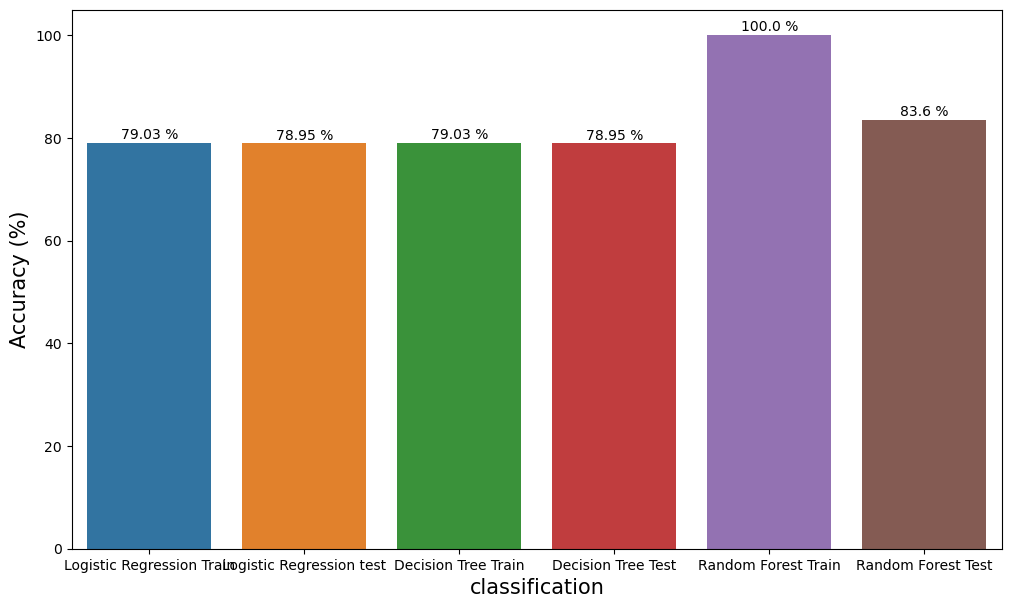

In [153]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=models, y=accuracy_list)
plt.xlabel("classification", fontsize=15)
plt.ylabel("Accuracy (%)", fontsize=15)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(f"{height} %", (x + width/2, y + height*1.01), ha="center")
plt.show()

**The Logistic Regression model achieved an accuracy of 79.03% on the training data and 79.95% on the test data.** 

**The Decision Tree model yielded high accuracy levels with 79.03% on the training data and 78.95% on the test data.**

**The Random Forest model obtained respectable accuracies of 100% on the training data and 83.6% on the test data.**

**In conclusion, the Random Forest model provides the best accuracy results, with a high testing accuracy of 100%. This suggests that the Random Forest model is more likely to perform well on new, unseen data and is the most suitable choice among the three models for this specific problem.**

In [ ]:
# Scaling the data
mn=MinMaxScaler()
for i in num_cols:
    x_train[i]=mn.fit_transform(x_train[[i]])
    x_test[i]=mn.transform(x_test[[i]])

In [ ]:
categorical_features = [d for d in X.columns if X[d].dtype == "object"]
numeric_features = [d for d in X.columns if X[d].dtype != "object"]

In [ ]:
numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])

categorical_transformer = Pipeline(steps=[("encoder", OneHotEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_transformer, numeric_features),
        ("categorical", categorical_transformer, categorical_features),
    ]
)

pipeline = Pipeline(steps=[("preprocessing", preprocessor)])